In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

# Function to extract execution times from file
def extract_times(filename):
    with open(filename, 'r') as file:
        content = file.read()
        real_times = re.findall(r'real\s+(\dm[\d\.]+s)', content)
        real_times = [float(time.replace('m', '').replace('s', '')) for time in real_times]
    return real_times

# Function to calculate statistics (mean and standard deviation)
def calculate_stats(times):
    mean = np.mean(times)
    std = np.std(times)
    return mean, std

# Function to extract thread counts from file
def extract_threads(filename, task_number):
    with open(filename, 'r') as file:
        content = file.read()
        threads = re.findall(r'Running task{}_optimized with (\d+) threads'.format(task_number), content)
        threads = [int(thread) for thread in threads]
    return threads

# Function to compute means and standard deviations for different thread counts
def compute_stats_threads(times, threads):
    thread_counts = sorted(set(threads))
    means = []
    stds = []
    for count in thread_counts:
        thread_times = [time for time, thread in zip(times, threads) if thread == count]
        means.append(np.mean(thread_times))
        stds.append(np.std(thread_times))
    return thread_counts, means, stds

# Function to plot the performance graph
def plot_performance(ax, thread_counts, means, stds, unoptimized_mean):
    ax.bar(thread_counts, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
    ax.axhline(unoptimized_mean, color='red', linestyle='--', label='Unoptimized')
    ax.set_xlabel('Number of Threads')
    ax.set_ylabel('Execution Time (seconds)')
    ax.set_xticks(thread_counts)
    ax.grid(True, which='both', axis='y')  # setting grid for y-axis
    ax.legend()

# Function to plot the efficiency graph
def plot_efficiency(ax, thread_counts, means):
    efficiencies = [means[0] / (mean * thread) for mean, thread in zip(means, thread_counts)]
    ax.plot(thread_counts, efficiencies, marker='o')
    ax.set_xlabel('Number of Threads')
    ax.set_ylabel('Efficiency')
    ax.set_xticks(thread_counts)
    ax.grid(True, which='both', axis='y')  # setting grid for y-axis

# Function to plot the execution times with error bars
def plot_times(labels, means, stds):
    x = np.arange(len(labels))
    width = 0.35
    
    _, ax = plt.subplots()
    ax.bar(x, means, width, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
    ax.set_ylabel('Execution Time (seconds)')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.grid(True, which='both', axis='y')  # Corrected grid activation

    plt.tight_layout()
    plt.show()


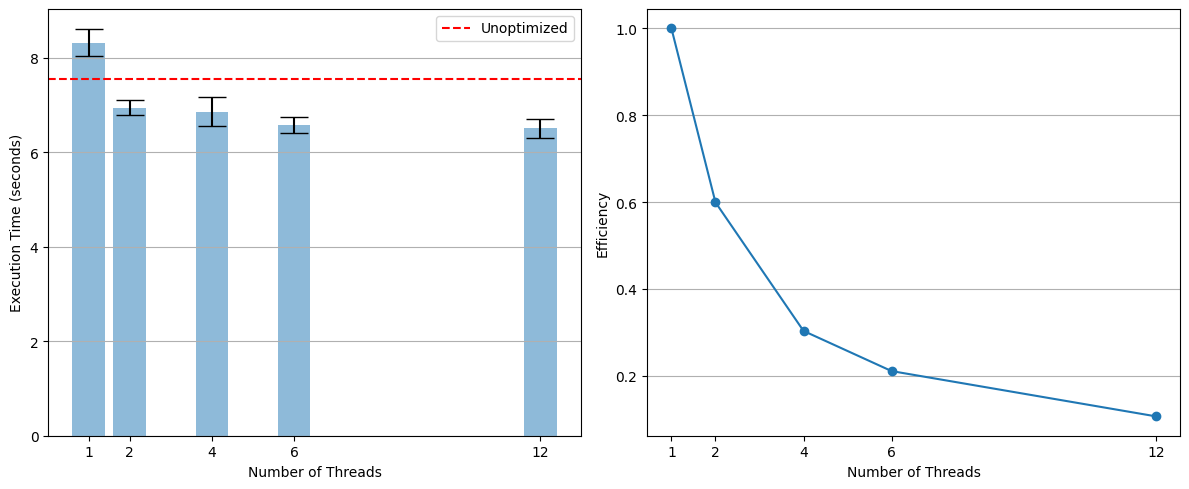

In [2]:
optimized_times = extract_times('task1_optimized_benchmark.out')
unoptimized_times = extract_times('task1_original_benchmark.out')
threads = extract_threads('task1_optimized_benchmark.out', 1)

thread_counts, optimized_means, optimized_stds = compute_stats_threads(optimized_times, threads)
unoptimized_mean = np.mean(unoptimized_times)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

plot_performance(ax1, thread_counts, optimized_means, optimized_stds, unoptimized_mean)
plot_efficiency(ax2, thread_counts, optimized_means)

plt.tight_layout()
plt.show()

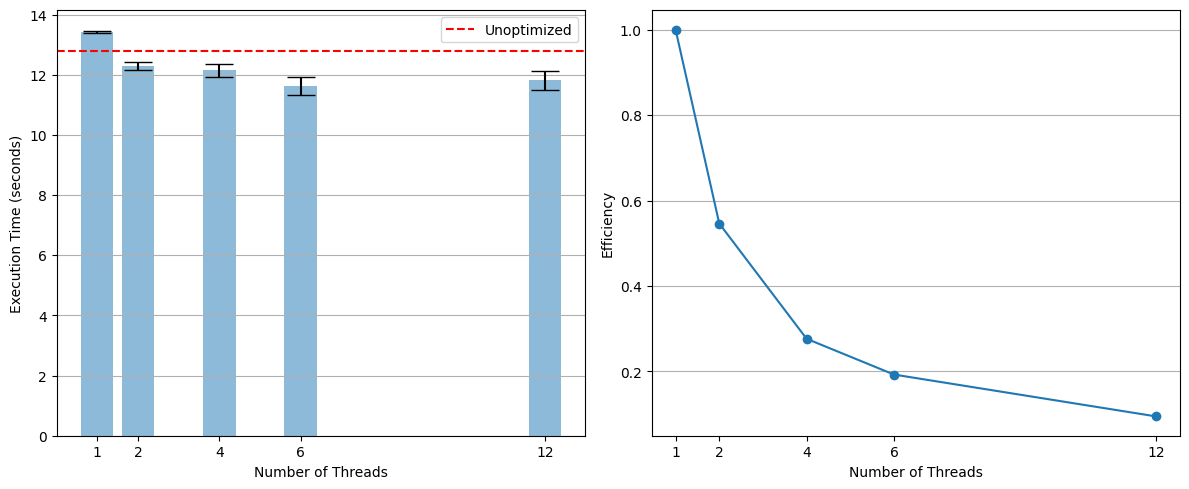

In [3]:
optimized_times = extract_times('task2_optimized_benchmark.out')
unoptimized_times = extract_times('task2_original_benchmark.out')
threads = extract_threads('task2_optimized_benchmark.out', 2)

thread_counts, optimized_means, optimized_stds = compute_stats_threads(optimized_times, threads)
unoptimized_mean = np.mean(unoptimized_times)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

plot_performance(ax1, thread_counts, optimized_means, optimized_stds, unoptimized_mean)
plot_efficiency(ax2, thread_counts, optimized_means)

plt.tight_layout()
plt.show()

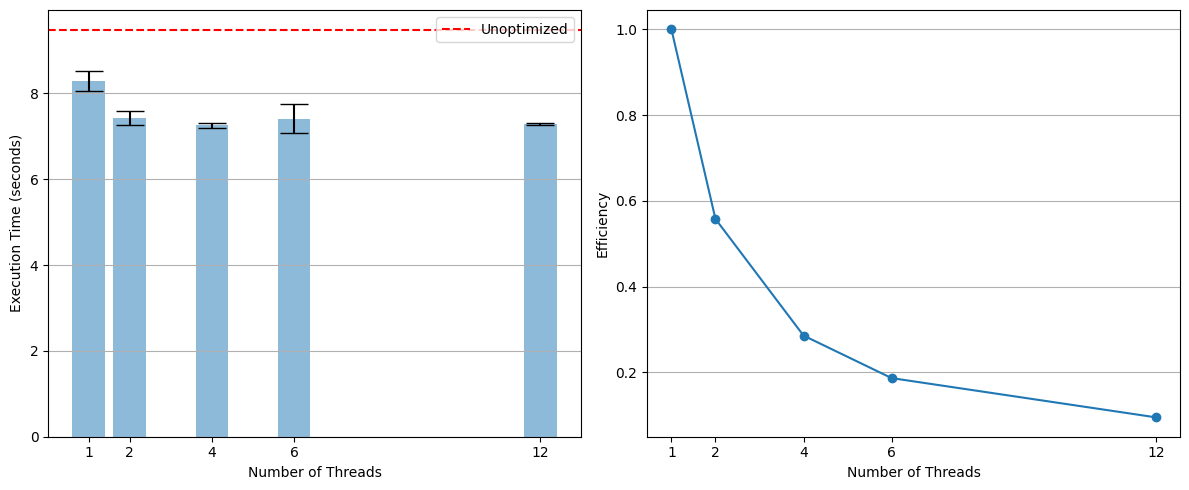

In [4]:
optimized_times = extract_times('task3_optimized_benchmark.out')
unoptimized_times = extract_times('task3_original_benchmark.out')
threads = extract_threads('task3_optimized_benchmark.out', 3)

thread_counts, optimized_means, optimized_stds = compute_stats_threads(optimized_times, threads)
unoptimized_mean = np.mean(unoptimized_times)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

plot_performance(ax1, thread_counts, optimized_means, optimized_stds, unoptimized_mean)
plot_efficiency(ax2, thread_counts, optimized_means)

plt.tight_layout()
plt.show()